# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Annisa Fitrana
- **Email:** 03.annisafitriana@gmail.com
- **ID Dicoding:** MS060D5X0565

## Menentukan Pertanyaan Bisnis

- Bagaimana rata rata penyewaan sepeda setiap bulannya?
- Pada musim apa penyewaan sepeda paling banyak?
- Apakah penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


## Data Wrangling

### Gathering Data

In [3]:
data = pd.read_csv("./data/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
dataJam = pd.read_csv("./data/hour.csv")
dataJam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memahami struktur data dan nama kolom.
- Melihat apakah ada format yang aneh atau tidak sesuai.

### Assessing Data

In [5]:
# assessing data => ngecheck missing values
(data.isnull().sum(), dataJam.isnull().sum())

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

**Insight:**
- Jika tidak ada missing values (semua 0), berarti data lengkap.

In [8]:
# assessing data => ngecheck duplicate
data.duplicated().sum(), dataJam.duplicated().sum()

(np.int64(0), np.int64(0))

**Insight:**
- Jika tidak ada duplicate data (semua 0), berarti data sudah unik.

In [5]:
# assessing data => ngecheck outlier / pencilan


def detect_all_outliers_iqr(data):
    outlier_counts = {}

    for column in data.select_dtypes(include=[np.number]).columns:  # Hanya kolom numerik
        q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        outliers = data[(data[column] < minimum) | (data[column] > maximum)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

outliers_data = detect_all_outliers_iqr(data)
outliers_dataJam = detect_all_outliers_iqr(dataJam)

print("Outlier di data:")
print(outliers_data)

print("\nOutlier di dataJam:")
print(outliers_dataJam)

Outlier di data:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}

Outlier di dataJam:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


hasil : Outlier di data:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}

Outlier di dataJam:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}

**Insight:**
- Bisa melihat berapa banyak outlier di setiap kolom.
- Bisa mengecek apakah outlier terjadi di variabel penting.
- Jika outlier terlalu banyak, mungkin perlu dilakukan imputation

### Cleaning Data

In [15]:



def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    minimum = np.floor(minimum) if np.issubdtype(df[column].dtype, np.integer) else minimum
    maximum = np.ceil(maximum) if np.issubdtype(df[column].dtype, np.integer) else maximum

    df.loc[df[column] > maximum, column] = maximum
    df.loc[df[column] < minimum, column] = minimum

    return df

#Implutation outlier dari data Hari
for col in data.select_dtypes(include=[float, int]).columns:
    data = impute_outliers_iqr(data, col)

#Implutation outlier dari data Jam
for col in dataJam.select_dtypes(include=[float, int]).columns:
    dataJam = impute_outliers_iqr(dataJam, col)


**Insight:**
-  Setelah cleaning untuk outlier, Distribusi data lebih stabil
- Statistik lebih seimbang
- Penyewaan sepeda lebih mudah dianalisis
-Data lebih siap untuk Machine Learning

## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik

In [51]:
# eksplorasi parameter statistik 
print("📈 EDA Univariate: Statistik Deskriptif")

pd.options.display.float_format = '{:.2f}'.format
print(numeric_data.describe())


📈 EDA Univariate: Statistik Deskriptif
       instant  season     yr   mnth  holiday  weekday  workingday  \
count   731.00  731.00 731.00 731.00   731.00   731.00      731.00   
mean    366.00    2.50   0.50   6.52     0.00     3.00        0.68   
std     211.17    1.11   0.50   3.45     0.00     2.00        0.47   
min       1.00    1.00   0.00   1.00     0.00     0.00        0.00   
25%     183.50    2.00   0.00   4.00     0.00     1.00        0.00   
50%     366.00    3.00   1.00   7.00     0.00     3.00        1.00   
75%     548.50    3.00   1.00  10.00     0.00     5.00        1.00   
max     731.00    4.00   1.00  12.00     0.00     6.00        1.00   

       weathersit   temp  atemp    hum  windspeed  casual  registered     cnt  
count      731.00 731.00 731.00 731.00     731.00  731.00      731.00  731.00  
mean         1.40   0.50   0.47   0.63       0.19  824.40     3656.17 4504.35  
std          0.54   0.18   0.16   0.14       0.08  623.68     1560.26 1937.21  
min       

### Agregasi ...

In [17]:
# Agregasi Bulanan
monthly_avg = data.groupby("mnth")["cnt"].mean().reset_index()
monthly_avg = monthly_avg.sort_values(by="cnt", ascending=False) 
print(monthly_avg)


    mnth          cnt
5      6  5772.366667
8      9  5766.516667
7      8  5664.419355
6      7  5563.677419
4      5  5349.774194
9     10  5199.225806
3      4  4484.900000
10    11  4247.183333
2      3  3692.258065
11    12  3403.806452
1      2  2655.298246
0      1  2176.338710


In [21]:
# Agregasi per musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

avg_users_hari = data.groupby("season")["cnt"].mean()
avg_users_jam = dataJam.groupby("season")["cnt"].mean()


avg_users_hari.index = avg_users_hari.index.map(season_labels)
avg_users_jam.index = avg_users_jam.index.map(season_labels)

df_summary = pd.DataFrame({
    "Rata-rata Harian": avg_users_hari,
    "Rata-rata Per Jam": avg_users_jam
})

print(df_summary)


        Rata-rata Harian  Rata-rata Per Jam
season                                     
Spring       2604.132597         111.114569
Summer       4992.331522         208.344069
Fall         5644.303191         236.016237
Winter       4728.162921         198.868856


In [22]:
# Agregasi workingday
workday_effect = data.groupby("workingday")[["casual", "registered"]].mean()
print(workday_effect)


                 casual   registered
workingday                          
0           1371.134199  2959.034632
1            606.570000  3978.250000


In [24]:
# Binning Suhu
bins = [0, 0.3, 0.6, 1.0] 
labels = ["Dingin", "Sedang", "Hangat"]
data["temp_category"] = pd.cut(data["temp"], bins=bins, labels=labels)

print("Rata-rata Penyewaan Berdasarkan Suhu:")
print(data.groupby("temp_category", observed=False)["cnt"].mean())

Rata-rata Penyewaan Berdasarkan Suhu:
temp_category
Dingin    2381.214815
Sedang    4488.178363
Hangat    5654.559055
Name: cnt, dtype: float64


### EDA

In [39]:
# 📊 EDA Multivariate: Identifikasi Korelasi Kuat
print("📊 EDA Multivariate: Identifikasi Korelasi Kuat\n")

correlation_matrix = numeric_data.corr()
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].fillna("")


print("Korelasi yang lebih besar dari 0.5 atau kurang dari -0.5:\n")
print(strong_correlations)


EDA Multivariate: Identifikasi Korelasi Kuat
             instant   season        yr     mnth  holiday  weekday  \
instant     1.000000      NaN  0.866025      NaN      NaN      NaN   
season           NaN  1.00000       NaN  0.83144      NaN      NaN   
yr          0.866025      NaN  1.000000      NaN      NaN      NaN   
mnth             NaN  0.83144       NaN  1.00000      NaN      NaN   
holiday          NaN      NaN       NaN      NaN      NaN      NaN   
weekday          NaN      NaN       NaN      NaN      NaN      1.0   
workingday       NaN      NaN       NaN      NaN      NaN      NaN   
weathersit       NaN      NaN       NaN      NaN      NaN      NaN   
temp             NaN      NaN       NaN      NaN      NaN      NaN   
atemp            NaN      NaN       NaN      NaN      NaN      NaN   
hum              NaN      NaN       NaN      NaN      NaN      NaN   
windspeed        NaN      NaN       NaN      NaN      NaN      NaN   
casual           NaN      NaN       NaN      

In [16]:

#EDA Numerikal

print("\n📉 EDA Numerikal: Ringkasan Data Numerik")
data[["temp", "hum", "windspeed", "casual", "registered", "cnt"]].describe()




📉 EDA Numerikal: Ringkasan Data Numerik


,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.628197,0.189846,824.403557,3656.172367,4504.348837
std,0.183051,0.141320,0.075644,623.677808,1560.256377,1937.211452
min,0.059130,0.204687,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.972500,0.380611,2267.000000,6946.000000,8714.000000


In [6]:

# EDA Kategorikal
print("📊 EDA Kategorikal: Distribusi Data Kategori")
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"\nDistribusi {col}:")
    print(data[col].value_counts())


📊 EDA Kategorikal: Distribusi Data Kategori

Distribusi dteday:
dteday
2012-12-31    1
2011-01-01    1
2011-01-02    1
2011-01-03    1
2011-01-04    1
             ..
2011-01-16    1
2011-01-15    1
2011-01-14    1
2011-01-13    1
2011-01-12    1
Name: count, Length: 731, dtype: int64


**Insight:**
- Mengetahui rata rata penyewan paling banyak disetiap bulan dan musimnya
- Perbandingan antara workingday dan libur untuk penyewa terdaftar dan penyewa tidak terdaftar
- Dapat mengetahui rata rata penyewaan sepeda per hari dan per jam
- Perbandingan jumlah penyewaan sepeda tergantung pada suhu dan musim
- Pola penyewaan sepeda, apakah working day mempengaruhi secara signifikan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

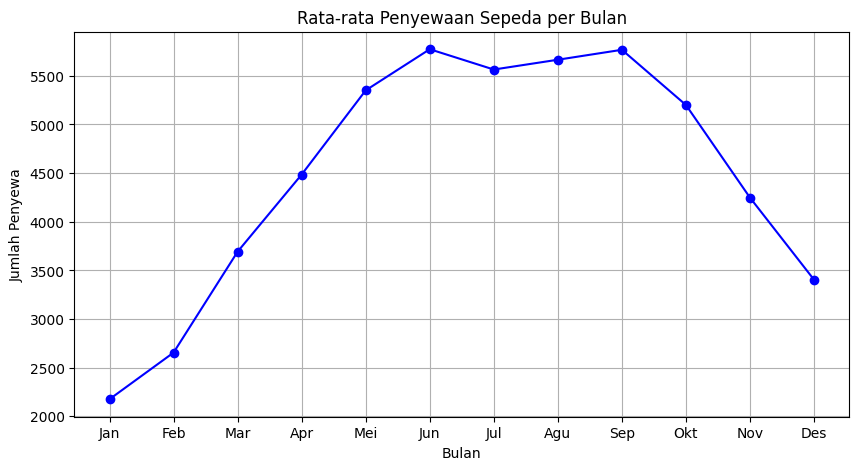

In [6]:
# Visualisasi data per bulan

data["dteday"] = pd.to_datetime(data["dteday"])

monthly_trend = data.groupby("mnth")["cnt"].mean()

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend, marker="o", linestyle="-", color="b")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.title("Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.grid(True)
plt.show()

### Pertanyaan 2:

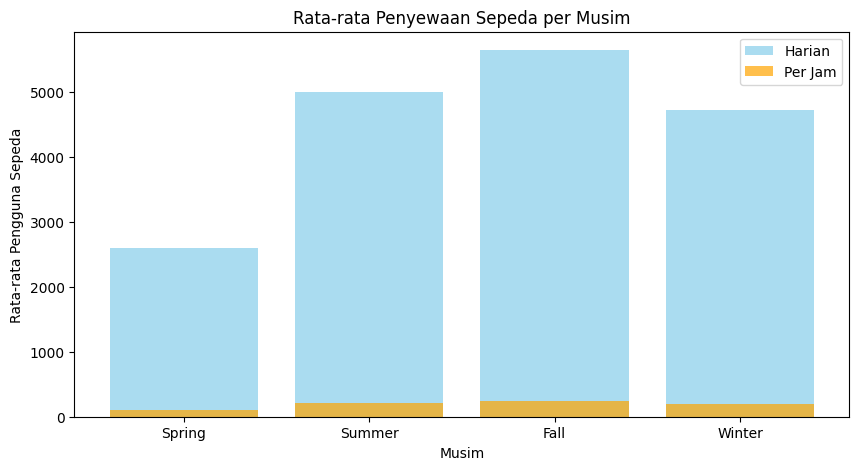

In [7]:
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

avg_users_hari = data.groupby("season")["cnt"].mean()
avg_users_jam = dataJam.groupby("season")["cnt"].mean()

avg_users_hari.index = avg_users_hari.index.map(season_labels)
avg_users_jam.index = avg_users_jam.index.map(season_labels)


plt.figure(figsize=(10, 5))
plt.bar(avg_users_hari.index, avg_users_hari, color="skyblue", alpha=0.7, label="Harian")
plt.bar(avg_users_jam.index, avg_users_jam, color="orange", alpha=0.7, label="Per Jam")

plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.legend()
plt.show()

### Pertanyaan 3:

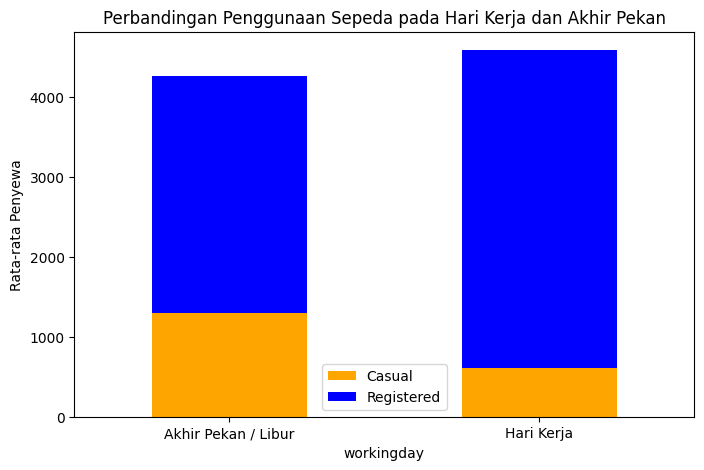

In [24]:
# Visualisasi data pada workingday dan libur
workday_effect = data.groupby("workingday")[["casual", "registered"]].mean()

workday_effect.plot(kind="bar", stacked=True, figsize=(8, 5), color=["orange", "blue"])
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan / Libur", "Hari Kerja"], rotation=0)
plt.title("Perbandingan Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan")
plt.ylabel("Rata-rata Penyewa")
plt.legend(["Casual", "Registered"])
plt.show()

**Insight:**
- Melihat pola dan perbandingan penyewaan setiap bulannya
- Musim yang berbeda mempengaruhi jumlah penyewa di setiap dan dan harinya
- Pola penyewaan sepeda yang lebih tinggi pada workingday atau tidak
- Perbandingan antara penyewa terdaftar dan tidak

## Analisis Lanjutan (Opsional)

In [11]:


hourly_trend = dataJam.groupby("hr")["cnt"].mean()
print(hourly_trend)


hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     347.147180
9     219.309491
10    173.668501
11    208.110041
12    252.173077
13    252.288066
14    240.111111
15    250.385460
16    311.294521
17    429.234247
18    401.434066
19    310.984890
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


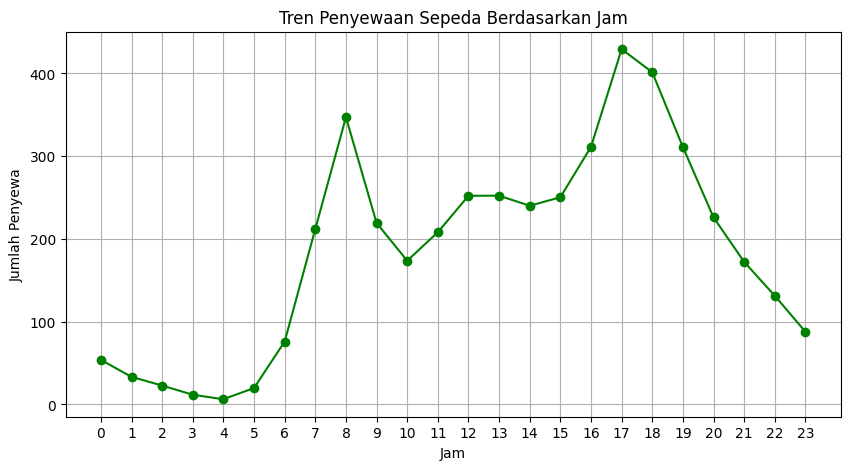

In [26]:

hourly_trend = dataJam.groupby("hr")["cnt"].mean()

# Kapan jam sibuk penggunaan sepeda
plt.figure(figsize=(10, 5))
plt.plot(hourly_trend, marker="o", linestyle="-", color="g")
plt.xticks(ticks=range(0, 24))
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewa")
plt.grid(True)
plt.show()


In [28]:
weather_effect = data.groupby("weathersit")["cnt"].mean().reset_index()
print(weather_effect)


   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


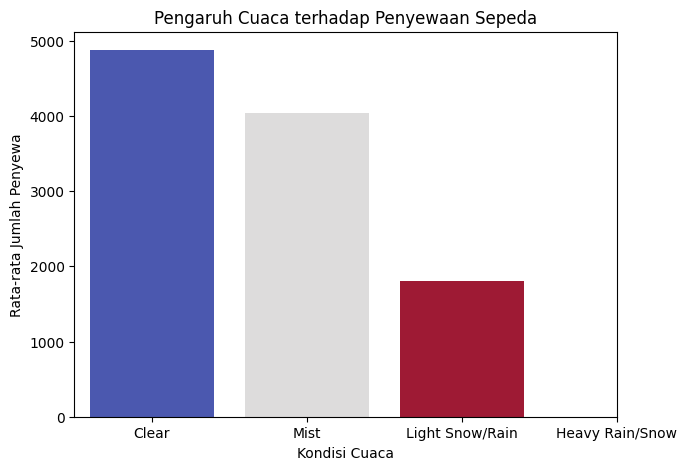

In [8]:
weather_effect = data.groupby("weathersit")["cnt"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(7, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_effect, hue="weathersit", palette="coolwarm", legend=False)  # Hue ditambahkan
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.xlabel("Kondisi Cuaca")
plt.show()


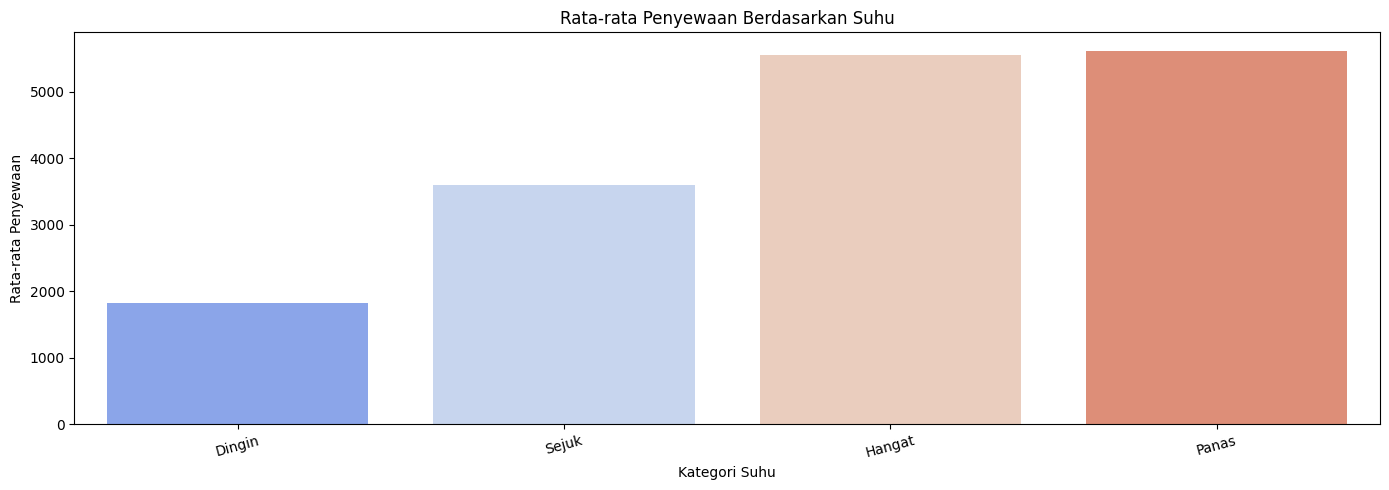

In [43]:
# Membuat kategori suhu (binning)
num_bins = 4
data["temp_category"] = pd.cut(
    data["temp"] * 41, bins=num_bins, labels=["Dingin", "Sejuk", "Hangat", "Panas"], include_lowest=True
)
temp_rental_avg = data.groupby("temp_category", observed=False)["cnt"].mean().reset_index()
fig, ax = plt.subplots(figsize=(14, 5))  
sns.barplot(x="temp_category", y="cnt", hue="temp_category", data=temp_rental_avg, palette="coolwarm", legend=False, ax=ax)

ax.set_title("Rata-rata Penyewaan Berdasarkan Suhu")
ax.set_xlabel("Kategori Suhu")
ax.set_ylabel("Rata-rata Penyewaan")

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Conclusion

- rata rata penyewaan di bulan juni dan september lebih tinggi dibandingkan penyewaan di bulan lainnya dengan angka di bulan juni adalah 5772.37 dan angka dibulan september adalah 5766.52

- Pada musim gugur(perhari 5644.30, perjam 236.02) dan panas ( Perhari 4992.33, perjam 208.34) jumlah penyewa lebih banyak sesuai pada statik bulan

- Pada hari kerja penyewa lebih tinggi untuk yang sudah terdaftar atau langganan(3978.25), namun pada hari libur yang blm terdaftar lebih banyak, kemungkinan yang menyewa adalah pendatang atau turis (1371.13)

---Pertanyaan Analisis Lanjutan---
- Pada sore menjelang malam banyak penyewa yang kemungkinan untuk bersantai atau sekedar berjalan jalan(311.98 sampai 461.45, dari jam 4 Sore sampai 7 malam), namun di jam 8 memiliki statik penyewa yang cukup banyak (359.01) dibandingkan jam pagi lainnya yang kemungkinan adalah orang yang berangkat ke suatu tempat

- Di cuaca cerah memiliki jumlah penyewa yang sangat banyak (4876.79) karena situasi cocok untuk bersepeda

--- Saran untuk peningkatan penyewaan berdasarkan kesimpulan---
- Pada priode ramai yaitu bulan Juni dan September atau Musim panas dan Musim gugur bisa diberikan promosi atay event dengan paket langganan yang dapat menarik konsumen
- Targetkan casual atau penyewa yang tidak terdaftar dengan langganan penyewaan yang memiliki benefit baik dari segi harga (Misalnya jika melebihi syarat diskon seperti 6 kali penyewaan mendapat diskon ataupun benefit lain) ataupun fasilitas sepeda yang lebih menarik
- untuk meningkatkan periode atau musim yang sepi, bisa diadakan kampanye seperti Event "Bike For Fun" di Hari Kerja dengan Kampanye ajakan bersepeda ke kantor dengan hadiah bagi peserta aktif
- Dikarenakan cuaca dingin sepi pengunjung karena dianggap cuaca ekstrem, sediakan fasilitas seperti bagun titik-titik penyewaan dengan tempat berteduh agar pelanggan lebih nyaman ataupun aksesoris sepeda dengan ban antislip